# Movie Reviews dataset


Another category of string data beside categorical data is freeform text data that consists of phrases or sentences.
Examples include tweets, chat logs, and hotel reviews, as well as the collected
works of Shakespeare, the content of Wikipedia, or the Project Gutenberg collection
of 50,000 ebooks.In the context of text analysis, the dataset is often called the corpus,
and each data point, represented as a single text, is called a document.

The Movie Reviews dataset is a dataset of movie reviews from the IMDb (Internet Movie Database) website collected by Stanford researcher Andrew Maas. This dataset contains the text of the reviews, together with a label that indicates
whether a review is “positive” or “negative.” The IMDb website itself contains ratings from 1 to 10. To simplify the modeling, this annotation is summarized as a
two-class classification dataset where reviews with a score of 6 or higher are labeled as
positive, and the rest as negative. 

The task we want to solve is as follows: given a review and the associated label “positive” or “negative”, we want to train the model in order to assign the label
based on the text content of the review. This is a standard
binary classification task. However, the text data is not in a format that a machine
learning model can handle. We need to convert the string representation of the text
into a numeric representation that we can apply our machine learning algorithms to.


In [9]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

for dirname, _, filenames in os.walk('C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\IMDB Dataset.csv
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\imdb.vocab
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\imdbEr.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\README
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\labeledBow.feat
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\urls_neg.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\urls_pos.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\0_2.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets

C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\11615_1.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\11616_1.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\11617_1.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\11618_3.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\11619_1.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\1161_1.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\11620_4.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\11621_3.txt
C:/Users/

C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\1922_1.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\1923_1.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\1924_1.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\1925_1.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\1926_3.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\1927_1.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\1928_4.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\1929_1.txt
C:/Users/Giusepp

C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\3834_1.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\3835_2.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\3836_1.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\3837_4.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\3838_4.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\3839_1.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\383_1.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\3840_4.txt
C:/Users/Giuseppe

C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\5418_1.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\5419_1.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\541_1.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\5420_4.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\5421_1.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\5422_4.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\5423_2.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\5424_2.txt
C:/Users/Giuseppe

C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\7375_1.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\7376_2.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\7377_3.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\7378_4.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\7379_1.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\737_1.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\7380_1.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\7381_1.txt
C:/Users/Giuseppe

C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\9437_3.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\9438_4.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\9439_1.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\943_3.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\9440_1.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\9441_1.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\9442_1.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\neg\9443_1.txt
C:/Users/Giuseppe

C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\pos\10787_10.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\pos\10788_10.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\pos\10789_8.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\pos\1078_9.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\pos\10790_10.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\pos\10791_9.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\pos\10792_8.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\pos\10793_7.txt
C:/Use

C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\pos\12135_8.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\pos\12136_8.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\pos\12137_8.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\pos\12138_7.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\pos\12139_7.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\pos\1213_7.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\pos\12140_8.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\pos\12141_9.txt
C:/Users/

C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\pos\2415_7.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\pos\2416_7.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\pos\2417_8.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\pos\2418_8.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\pos\2419_7.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\pos\241_7.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\pos\2420_8.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\pos\2421_8.txt
C:/Users/Giuseppe

C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\pos\4485_8.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\pos\4486_7.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\pos\4487_9.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\pos\4488_10.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\pos\4489_10.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\pos\448_8.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\pos\4490_10.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\pos\4491_10.txt
C:/Users/Gius

C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\pos\6094_10.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\pos\6095_9.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\pos\6096_9.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\pos\6097_10.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\pos\6098_9.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\pos\6099_7.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\pos\609_7.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\test\pos\60_8.txt
C:/Users/Giuseppe

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\neg\920_1.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\neg\9210_1.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\neg\9211_2.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\neg\9212_1.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\neg\9213_3.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\neg\9214_3.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\neg\9215_1.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\neg\9216_3.txt
C:/Users/

C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\10687_10.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\10688_9.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\10689_8.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\1068_10.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\10690_10.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\10691_7.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\10692_8.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\10693_8.tx

C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\138_7.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\1390_9.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\1391_7.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\1392_7.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\1393_7.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\1394_8.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\1395_10.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\1396_8.txt
C:/Users

C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\3576_9.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\3577_7.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\3578_7.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\3579_8.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\357_10.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\3580_10.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\3581_9.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\3582_8.txt
C:/User

C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\5375_8.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\5376_7.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\5377_7.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\5378_7.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\5379_7.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\537_10.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\5380_7.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\5381_7.txt
C:/Users

C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\7329_8.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\732_7.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\7330_8.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\7331_10.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\7332_7.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\7333_10.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\7334_7.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\7335_7.txt
C:/User

C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\8784_9.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\8785_10.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\8786_8.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\8787_8.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\8788_10.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\8789_10.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\878_7.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\pos\8790_8.txt
C:/Use

C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\0_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\10000_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\10001_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\10002_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\10003_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\10004_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\10005_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\

C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\12022_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\12023_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\12024_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\12025_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\12026_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\12027_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\12028_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\un

C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\13505_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\13506_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\13507_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\13508_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\13509_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\1350_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\13510_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\uns

C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\15675_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\15676_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\15677_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\15678_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\15679_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\1567_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\15680_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\uns

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\28921_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\28922_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\28923_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\28924_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\28925_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\28926_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\28927_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\un

C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\3105_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\31060_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\31061_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\31062_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\31063_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\31064_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\31065_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\uns

C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\33029_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\3302_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\33030_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\33031_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\33032_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\33033_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\33034_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\uns

C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\34660_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\34661_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\34662_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\34663_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\34664_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\34665_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\34666_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\un

C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\36417_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\36418_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\36419_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\3641_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\36420_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\36421_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\36422_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\uns

C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\3795_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\37960_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\37961_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\37962_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\37963_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\37964_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\37965_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\uns

C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\39972_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\39973_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\39974_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\39975_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\39976_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\39977_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\39978_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\un

C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\41676_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\41677_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\41678_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\41679_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\4167_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\41680_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\41681_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\uns

C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\43498_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\43499_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\4349_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\434_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\43500_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\43501_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\43502_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup

C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\45025_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\45026_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\45027_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\45028_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\45029_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\4502_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\45030_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\uns

C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\46314_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\46315_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\46316_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\46317_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\46318_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\46319_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\unsup\4631_0.txt
C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset\aclImdb\train\uns

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [10]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# IMDB Dataset.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('C:/Users/Giuseppe Marino/Dropbox/Documents/AI/ML-Muller/Datasets in IMLP/Movie Reviews dataset/IMDB Dataset.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'IMDB Dataset.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

df1.head(5)


There are 1000 rows and 2 columns


review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

The next code cell define a function for plotting data.

In [11]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
    

<ipython-input-63-3255e223a234>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


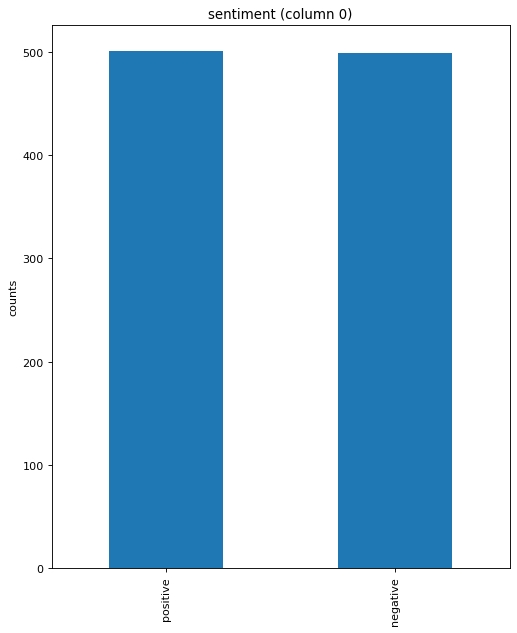

In [64]:
   plotPerColumnDistribution(df1, 10, 5)

In [12]:
from sklearn.model_selection import train_test_split


# change the label 
labels = np.array([1 if s == 'positive' else 0 for s in df1.sentiment])
reviews = df1.review.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
    reviews,
    labels,
    test_size=0.5,
    stratify=labels,
    random_state=42,
)

In [13]:
print("type of text_train: {}".format(type(X_train)))
print("length of text_train: {}".format(len(X_train)))
print("Samples per class (train): {}".format(np.bincount(y_train)))
print("text_train[1]:\n{}".format(X_train[1]))

print("type of text_test: {}".format(type(X_test)))
print("length of text_test: {}".format(len(X_test)))
print("Samples per class (test): {}".format(np.bincount(y_test)))
print("text_test[1]:\n{}".format(X_test[1]))

type of text_train: <class 'numpy.ndarray'>
length of text_train: 500
Samples per class (train): [249 251]
text_train[1]:
This is the best film the Derek couple has ever made and if you think this is a recommendation then you haven't seen any of the others. There are the usual ingredients: it is just as poorly acted as their other efforts, we can watch Bo disrobing or auditioning for wet T-shirt contests quite frequently, the story is just laughably idiotic, and the film takes itself much too seriously. And then: Orang Utans in Africa?<br /><br />But it has a few things going for it. Bo looks great, the production values (sets, costumes, etc.) are quite good, and this greatly enhances its camp value. In a strange way it is actually quite funny, simply because it tries to be serious and fails so badly.
type of text_test: <class 'numpy.ndarray'>
length of text_test: 500
Samples per class (test): [250 250]
text_test[1]:
They filmed this movie out on long Island, where I grew up. My brothe

# Pretreatment & Normalization


# Remove HTML line breaks

the
review contains some HTML line breaks ("<br/>"). While these are unlikely to have a large impact on our machine learning models, it is better to clean the data and
remove this formatting.


In [14]:
text_train = [doc.replace("<br />", " ") for doc in X_train]
text_test = [doc.replace("<br />", " ") for doc in X_test]


# Bag of words representation 

This representation transform the text by discarding most of the structure of the input text, like chapters, paragraphs,
sentences, and formatting, and only count how often each word appears in each text in the corpus.Discarding the structure and counting only word occurrences leads to the
mental image of representing text as a “bag.”

Computing the bag-of-words representation for a corpus of documents consists of
the following three steps:
1. Tokenization. Split each document into the words that appear in it (called tokens),
for example by splitting them on whitespace and punctuation.
2. Vocabulary building. Collect a vocabulary of all words that appear in any of the
documents, and number them (say, in alphabetical order).
3. Encoding. For each document, count how often each of the words in the vocabulary
appear in this document.

The bag-of-words representation is implemented in CountVectorizer, which is a
transformer. Fitting the CountVectorizer consists of the tokenization of the training data and
building of the vocabulary, which we can access as the vocabulary_ attribute. 
The CountVectorizer
extracts tokens using a regular expression. By default, the regular expression that is
used is "\b\w\w+\b". If you are not familiar with regular expressions, this means it
finds all sequences of characters that consist of at least two letters or numbers (\w)
and that are separated by word boundaries (\b). It does not find single-letter words,
and it splits up contractions like “doesn’t” or “bit.ly”, but it matches “h8ter” as a single
word. The CountVectorizer then converts all words to lowercase characters, so that
“soon”, “Soon”, and “sOon” all correspond to the same token (and therefore feature).
A way to access the vocabulary is using the get_feature_name method of the
vectorizer, which returns a convenient list where each entry corresponds to one feature.


Finally, we call the transform
method, which stores the build vocabulary in a SciPy sparse matrix. The matrix will have as mmany rows as the number of documents in the corpus and as many features as the (non zero) words in the
vocabulary.

In [15]:
from sklearn.feature_extraction.text import CountVectorizer



vect = CountVectorizer().fit(text_train)

print("Vocabulary size: {}".format(len(vect.vocabulary_)))
# print("Vocabulary content:\n {}".format(vect.vocabulary_))

X_train = vect.transform(text_train)
print("X_train:\n{}".format(repr(X_train)))

feature_names = vect.get_feature_names()
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 2000th feature:\n{}".format(feature_names[::2000]))


Vocabulary size: 12560
X_train:
<500x12560 sparse matrix of type '<class 'numpy.int64'>'
	with 70166 stored elements in Compressed Sparse Row format>
Number of features: 12560
First 20 features:
['00', '000', '007', '00am', '01pm', '08', '10', '100', '1000', '100th', '102', '103', '105', '11', '12', '120', '13', '135', '13th', '14']
Features 20010 to 20030:
[]
Every 2000th feature:
['00', 'checks', 'exercise', 'italian', 'owners', 'shaw', 'viewing']


## Token minimum frequency

As we saw above we get
many uninformative features (like the numbers). One way to cut back on these is to
only use tokens that appear in at least two documents (or at least five documents, and
so on). A token that appears only in a single document is unlikely to appear in the test
set and is therefore not helpful. We can set the minimum number of documents a
token needs to appear in with the min_df parameter.


In [16]:
vect_min_df = CountVectorizer(min_df=5).fit(text_train)
X_train_min_df = vect_min_df.transform(text_train)
print("X_train with min_df: {}".format(repr(X_train_min_df)))

feature_names = vect_min_df.get_feature_names()
print("First 50 features:\n{}".format(feature_names[:50]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 700th feature:\n{}".format(feature_names[::700]))

X_train with min_df: <500x2174 sparse matrix of type '<class 'numpy.int64'>'
	with 54266 stored elements in Compressed Sparse Row format>
First 50 features:
['000', '10', '100', '11', '12', '13', '13th', '15', '17', '1930s', '1970', '1999', '20', '20th', '25', '30', '50', '60', '70', '70s', '80', '80s', '90', 'abandoned', 'ability', 'able', 'about', 'above', 'absolutely', 'absurd', 'abuse', 'accent', 'accents', 'accept', 'accepted', 'accident', 'according', 'accurate', 'achieve', 'across', 'act', 'acted', 'acting', 'action', 'actor', 'actors', 'actress', 'actresses', 'acts', 'actual']
Features 20010 to 20030:
[]
Every 700th feature:
['000', 'feel', 'plan', 'whenever']


## Token minimum freq stop words and max frequency

Another way that we can get rid of uninformative words is by discarding words that
are too frequent to be informative. There are two main approaches: using a languagespecific
list of stopwords or discarding words that appear too frequently.

As the number of stopwords in this predefined list is 318 and there will be 305 number of features less now 305 (27,271–26,966 for the complete dataset) ( or 2174-1923=251 for 1000 docs only), it means that
most, but not all, of the stopwords appeared.
Again this filter might lead to an improvement in performance.

In [17]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("Number of stop words: {}".format(len(ENGLISH_STOP_WORDS)))
print("Every 10th stopword:\n{}".format(list(ENGLISH_STOP_WORDS)[::10]))

# Specifying stop_words="english" uses the built-in list.
# We could also augment it and pass our own.
vect_stop_words = CountVectorizer(min_df=5, stop_words="english").fit(text_train)
X_train_stop_words = vect_stop_words.transform(text_train)
print("X_train with  min df and stop words:\n{}".format(repr(X_train_stop_words)))

feature_names = vect_stop_words.get_feature_names()
print("First 50 features:\n{}".format(feature_names[:50]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 700th feature:\n{}".format(feature_names[::700]))


Number of stop words: 318
Every 10th stopword:
['name', 'in', 'of', 'twelve', 'thereafter', 'become', 'two', 'nor', 'you', 'off', 'an', 'whatever', 'everything', 'besides', 'hereby', 'may', 'he', 'nothing', 'bottom', 'thus', 'below', 'among', 'thereby', 'whither', 'across', 'otherwise', 'either', 'elsewhere', 'fire', 'rather', 'these', 'been']
X_train with  min df and stop words:
<500x1923 sparse matrix of type '<class 'numpy.int64'>'
	with 29685 stored elements in Compressed Sparse Row format>
First 50 features:
['000', '10', '100', '11', '12', '13', '13th', '15', '17', '1930s', '1970', '1999', '20', '20th', '25', '30', '50', '60', '70', '70s', '80', '80s', '90', 'abandoned', 'ability', 'able', 'absolutely', 'absurd', 'abuse', 'accent', 'accents', 'accept', 'accepted', 'accident', 'according', 'accurate', 'achieve', 'act', 'acted', 'acting', 'action', 'actor', 'actors', 'actress', 'actresses', 'acts', 'actual', 'actually', 'adam', 'add']
Features 20010 to 20030:
[]
Every 700th feature

In [18]:
vect_max_df = CountVectorizer(min_df=5, stop_words="english", max_df=50).fit(text_train)
X_train_max_df = vect_max_df.transform(text_train)
print("X_train with min df, stop words and max df:\n{}".format(repr(X_train_max_df)))

feature_names = vect_max_df.get_feature_names()
print("First 50 features:\n{}".format(feature_names[:50]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 700th feature:\n{}".format(feature_names[::700]))


X_train with min df, stop words and max df:
<500x1846 sparse matrix of type '<class 'numpy.int64'>'
	with 22448 stored elements in Compressed Sparse Row format>
First 50 features:
['000', '100', '11', '12', '13', '13th', '15', '17', '1930s', '1970', '1999', '20', '20th', '25', '30', '50', '60', '70', '70s', '80', '80s', '90', 'abandoned', 'ability', 'able', 'absolutely', 'absurd', 'abuse', 'accent', 'accents', 'accept', 'accepted', 'accident', 'according', 'accurate', 'achieve', 'act', 'acted', 'action', 'actor', 'actress', 'actresses', 'acts', 'actual', 'adam', 'add', 'added', 'adding', 'adds', 'admit']
Features 20010 to 20030:
[]
Every 700th feature:
['000', 'god', 'screening']


## Term frequency–inverse document frequency (tf-idf) method

Instead of dropping features that are deemed unimportant, another approach is to
rescale features by how informative we expect them to be. The intuition of this method is to give high weight to any term that appears
often in a particular document, but not in many documents in the corpus. If a word
appears often in a particular document, but not in very many documents, it is likely
to be very descriptive of the content of that document. scikit-learn implements the
tf–idf method in two classes: TfidfTransformer, which takes in the sparse matrix
output produced by CountVectorizer and transforms it, and TfidfVectorizer,
which takes in the text data and does both the bag-of-words feature extraction and
the tf–idf transformation.

The tf–idf score for word w in document d
as implemented in both the TfidfTransformer and TfidfVectorizer classes is given
by:7
tfidf w, d = tf log N + 1
Nw + 1 + 1
where N is the number of documents in the training set, Nw is the number of documents
in the training set that the word w appears in, and tf (the term frequency) is the
number of times that the word w appears in the query document d (the document
you want to transform or encode). Both classes also apply L2 normalization after
computing the tf–idf representation; in other words, they rescale the representation
of each document to have Euclidean norm 1. Rescaling in this way means that the
length of a document (the number of words) does not change the vectorized representation.

As you can see, there is some improvement when using tf–idf instead of just word
counts. We can also inspect which words tf–idf found most important. Keep in mind
that the tf–idf scaling is meant to find words that distinguish documents, but it is a
purely unsupervised technique. So, “important” here does not necessarily relate to the
“positive review” and “negative review” labels we are interested in. First, we extract
the TfidfVectorizer from the pipeline:

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect_tf_idf = TfidfVectorizer(min_df=5, norm=None).fit(text_train)
X_train_tf_idf = vect_tf_idf.transform(text_train)
print("X_train with tf-idf:\n{}".format(repr(X_train_tf_idf)))

feature_names = vect_tf_idf.get_feature_names()
print("First 50 features:\n{}".format(feature_names[:50]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 700th feature:\n{}".format(feature_names[::700]))


X_train with tf-idf:
<500x2174 sparse matrix of type '<class 'numpy.float64'>'
	with 54266 stored elements in Compressed Sparse Row format>
First 50 features:
['000', '10', '100', '11', '12', '13', '13th', '15', '17', '1930s', '1970', '1999', '20', '20th', '25', '30', '50', '60', '70', '70s', '80', '80s', '90', 'abandoned', 'ability', 'able', 'about', 'above', 'absolutely', 'absurd', 'abuse', 'accent', 'accents', 'accept', 'accepted', 'accident', 'according', 'accurate', 'achieve', 'across', 'act', 'acted', 'acting', 'action', 'actor', 'actors', 'actress', 'actresses', 'acts', 'actual']
Features 20010 to 20030:
[]
Every 700th feature:
['000', 'feel', 'plan', 'whenever']


### n-Grams Method

One of the main disadvantages of using a bag-of-words representation is that word
order is completely discarded. Therefore, the two strings “it’s bad, not good at all” and
“it’s good, not bad at all” have exactly the same representation, even though the meanings
are inverted.Fortunately, there is a way of capturing context when
using a bag-of-words representation, by not only considering the counts of single
tokens, but also the counts of pairs or triplets of tokens that appear next to each other.
Pairs of tokens are known as bigrams, triplets of tokens are known as trigrams, and
more generally sequences of tokens are known as n-grams. We can change the range
of tokens that are considered as features by changing the ngram_range parameter of
CountVectorizer or TfidfVectorizer.The ngram_range parameter is a tuple, consisting of the minimum length and the maximum length of the sequences of tokens
that are considered.

For most applications, the minimum number of tokens should be one, as single
words often capture a lot of meaning. Adding bigrams helps in most cases. Adding
longer sequences—up to 5-grams—might help too, but this will lead to an explosion
of the number of features and might lead to overfitting, as there will be many very
specific features. In principle, the number of bigrams could be the number of
unigrams squared and the number of trigrams could be the number of unigrams to
the power of three, leading to very large feature spaces. In practice, the number of
higher n-grams that actually appear in the data is much smaller, because of the structure
of the (English) language, though it is still large.

In [20]:
vect_n_grams = TfidfVectorizer(ngram_range=(1, 3),min_df=5, norm=None).fit(text_train)
X_train_n_grams = vect_n_grams.transform(text_train)
print("X_train with n_grams:\n{}".format(repr(X_train_n_grams)))
print("Vocabulary size: {}".format(len(vect_n_grams.vocabulary_)))

feature_names = vect_n_grams.get_feature_names()
print("First 50 features:\n{}".format(feature_names[:50]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 700th feature:\n{}".format(feature_names[::700]))



X_train with n_grams:
<500x4912 sparse matrix of type '<class 'numpy.float64'>'
	with 86093 stored elements in Compressed Sparse Row format>
Vocabulary size: 4912
First 50 features:
['000', '10', '10 minutes', '100', '11', '12', '13', '13th', '15', '17', '1930s', '1970', '1999', '20', '20th', '20th century', '25', '30', '50', '60', '70', '70s', '80', '80s', '90', 'abandoned', 'ability', 'ability to', 'able', 'able to', 'about', 'about his', 'about how', 'about it', 'about that', 'about the', 'about their', 'about this', 'about this film', 'about this movie', 'about to', 'about what', 'above', 'above the', 'absolutely', 'absolutely no', 'absurd', 'abuse', 'accent', 'accents']
Features 20010 to 20030:
[]
Every 700th feature:
['000', 'cannot be', 'for one', 'it never', 'of war', 'so', 'this the', 'young']


# Stemming and Lemmatization representations 

The tokenization techniques implemented by CountVectorizer and TfidfVectorizer do not distinguish between singular and plural and between different verbal conjugations. Leaving them indistinguishable will only
increase overfitting, and not allow the model to fully exploit the training data, thereby resulting in bad generalization. 

This problem can be overcome by normaization techniques which represent each word using its word stem, by identifying (or conflating) all the words that have the same word stem. If this
is done by using a rule-based heuristic, like dropping common suffixes, it is usually
referred to as stemming. In this case words and regular verbs will convolute to the same racin and irregular verbs could be reduced to a no-sense racin. This is why stemming while simple it is not very intersting in terms of performance.

If instead a dictionary of known word forms is used (an
explicit and human-verified system), and the role of the word in the sentence is taken
into account, the process is referred to as lemmatization and the standardized form of
the word is referred to as the lemma.

In general, lemmatization is a much more involved process than stemming,
but it usually produces better results than stemming when used for normalizing
tokens for machine learning.

CountVectorizer
allows specifying your own tokenizer to convert each document into a list of tokens
using the tokenizer parameter. We can use the lemmatization from spacy to create a
callable that will take a string and produce a list of lemmas.

In the following we want to use the regexp-based tokenizer
that is used by CountVectorizer and only use the lemmatization
from spacy. To this end, we replace nlp.tokenizer (the spacy tokenizer)
with the regexp-based tokenization.

In [21]:
import spacy
from spacy.tokens import Doc


import re
# regexp used in CountVectorizer
regexp = re.compile('(?u)\\b\\w\\w+\\b')



In [22]:
# load spacy's English-language models

nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])
old_tokenizer = nlp.tokenizer
# replace the tokenizer with the preceding regexp
nlp.tokenizer = lambda string: Doc(nlp.vocab, words = regexp.findall(string)) 

In [23]:
# create a custom tokenizer using the spacy document processing pipeline
# (now using our own tokenizer)
def custom_tokenizer(document):
    doc_spacy = nlp(document)
    return [token.lemma_ for token in doc_spacy]

In [24]:


# define a count vectorizer with the custom tokenizer
lemma_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=5)


As you can see from the output, lemmatization reduced the number of features from
2174 (with the standard CountVectorizer processing) to 1943. Lemmatization
can be seen as a kind of regularization, as it conflates certain features. Therefore, we
expect lemmatization to improve performance most when the dataset is small. 

In [25]:
# transform text_train using CountVectorizer with lemmatization
X_train_lemma = lemma_vect.fit_transform(text_train)
print("X_train_lemma.shape: {}".format(X_train_lemma.shape))

# standard CountVectorizer for reference
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train.shape: {}".format(X_train.shape))

X_train_lemma.shape: (500, 1943)
X_train.shape: (500, 2174)


# Decomposition method - Latent Dirichlet Allocation

LDA’s approach to topic modeling is it considers each document as a collection of topics in a certain proportion. And each topic as a collection of keywords, again, in a certain proportion.

Once you provide the algorithm with the number of topics, all it does it to rearrange the topics distribution within the documents and keywords distribution within the topics to obtain a good composition of topic-keywords distribution.

When I say topic, what is it actually and how it is represented?

A topic is nothing but a collection of dominant keywords that are typical representatives. Just by looking at the keywords, you can identify what the topic is all about. It is important to understand that for the machine
learning model a “topic” might not be what we would normally call a topic in everyday
speech, but that it resembles more to the components extracted by PCA or NMF, which might or might not have a semantic meaning. Taking the example of news articles, we might
have a collection of articles about sports, politics, and finance, written by two specific
authors. In a politics article, we might expect to see words like “governor,” “vote,”
“party,” etc., while in a sports article we might expect words like “team,” “score,” and
“season.” However, these are not
the only groups of words we might expect to appear together. The two reporters
might prefer different phrases or different choices of words. Other “topics” would
then be “words often used by reporter A” and “words often used by reporter B,”
though these are not topics in the usual sense of the word.

The following are key factors to obtaining good segregation topics:

The quality of text processing.
The variety of topics the text talks about.
The choice of topic modeling algorithm.
The number of topics fed to the algorithm.
The algorithms tuning parameters.

LSA vrsus LDA: LSA ( Latent Semantic Analysis) learns latent topics by performing a matrix decomposition (SVD) on the term-document matrix.
LDA is a generative probabilistic model, that assumes a Dirichlet prior over the latent topics.
In practice, LSI is much faster to train than LDA, but has lower accuracy.

it is often good to remove very common words,
as they might otherwise dominate the analysis. We’ll remove words that appear in at
least 20 percent of the documents, and we’ll limit the bag-of-words model to the
10,000 words that are most common after removing the top 20 percent.

We will learn a topic model with 10 topics, which is few enough that we can look at all
of them. The argument n_topics of the LatentDirichletAllocation function is set to 10 by default. Similarly to the components in NMF, topics don’t have an inherent ordering,
and changing the number of topics will change all of the topics. We’ll use the
"batch" learning method, which is somewhat slower than the default ("online") but
usually provides better results, and increase "max_iter", which can also lead to better
model

LatentDirichletAllocation
has a components_ attribute that stores how important each word is for each topic.
The size of components_ is (n_topics, n_words).

In [95]:
from sklearn.decomposition import LatentDirichletAllocation

vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(text_train)

lda = LatentDirichletAllocation(n_components=10, learning_method="batch",
max_iter=25, random_state=0)
# We build the model and transform the data in one step
# Computing transform takes some time,
# and we can save time by doing both at once
document_topics = lda.fit_transform(X)

lda.components_.shape

(10, 10000)

To understand better what the different topics mean, we will look at the most important
words for each of the topics. The print_topics function provides a nice formatting
for these features.

Judging from the important words, topic 1 seems to be about historical and war movies,
topic 2 might be about bad comedies, topic 3 might be about TV series. Topic 4
seems to capture some very common words, while topic 6 appears to be about children’s
movies and topic 8 seems to capture award-related reviews. Using only 10 topics,
each of the topics needs to be very broad, so that they can together cover all the different
kinds of reviews in our dataset.



In [96]:
# For each topic (a row in the components_), sort the features (ascending)
# Invert rows with [:, ::-1] to make sorting descending
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
# Get the feature names from the vectorizer
feature_names = np.array(vect.get_feature_names())

# Print out the 10 topics:
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
sorting=sorting, topics_per_chunk=5, n_words=10)



topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
show          funny         war           actors        funny         
big           however       part          down          each          
going         between       those         ve            should        
though        got           should        work          show          
now           action        though        same          pretty        
may           musical       gore          dance         comedy        
got           around        actors        however       own           
part          lot           cast          quite         thing         
julie         azumi         always        those         anything      
miss          re            take          point         fact          


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
woma

Next, we will learn another model, this time with 100 topics. Using more topics
makes the analysis much harder, but makes it more likely that topics can specialize to
interesting subsets of the data:

Looking at all 100 topics would be a bit overwhelming, so we selected some interesting
and representative topics. 

The topics we extracted this time seem to be more specific, though many are hard to
interpret. Topic 7 seems to be about horror movies and thrillers; topics 16 and 54
seem to capture bad reviews, while topic 63 mostly seems to be capturing positive
reviews of comedies.

In [102]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch",
max_iter=25, random_state=0)
document_topics100 = lda100.fit_transform(X)

topics = np.array([7, 16, 24, 25, 28, 36, 37, 45, 51, 53, 54, 63, 89, 97])
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names,
sorting=sorting, topics_per_chunk=7, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      topic 36      topic 37      
--------      --------      --------      --------      --------      --------      --------      
vonnegut      seagal        cassavetes    comedy        generally     murray        clara         
invisible     tourist       shot          thought       ziyi          predator      young         
script        thriller      now           disappointed  purple        alien         victoria      
beyond        trap          real          woody         making        fi            though        
elements      steven        shadows       may           editing       rather        believe       
fundamental   whole         american      enjoyed       butterfly     sci           rather        
imperial      jokes         years         years         zhang         horror        totally       
america       comedy        sense         wonderful     conflict      played        audience      
monster   

If we want to confirm the intuition we gained from looking at the highest ranking
words for each topic, we should look at the documents that are assigned to these
topics. For example, topic 51 seems to be about horror. Let’s check which kinds of
reviews are assigned to this topic. 

In [134]:
# sort by weight of "music" topic 45
horror = np.argsort(document_topics100[:, 51])[::-1]
# print the five documents where the topic is most important
for i in horror[:5]:
    # pshow first two sentences
    print('.'.join(text_train[i].split(".")[:2])+ ".\n")

Maybe it was the title, or the trailer (certainly not the interview on the DVD, which is with the director as he keeps saying "hi, kids" into the camera like a buffoon), but I had expectations for Entrails of a Virgin to be at least a bit of sleazy fun with some good sex scenes and brutal, bloody killings by a weird Japanese penetrator. Turns out it's way too sleazy for its own good, or bad, or whatever.

A brilliant horror film. Utterly gruesome and very scary too.

DON'T TORTURE A DUCKLING is one of Fulci's earlier (and honestly, in terms of story-line, better..

I saw this at the London Film Festival last night, apparently the shorter version. James McNally's summary of the content of the film is very good.

Yes, this is one of THOSE movies, so terrible, so insipid, so trite, that you will not be able to stop laughing. I have watched comedies, good comedies, and laughed less than my wife and I laughed at this movie.



Another
interesting way to inspect the topics is to see how much weight each topic gets overall,
by summing the document_topics over all reviews. We name each topic by the
two most common words. Figure below shows the topic weights learned.



It seems like LDA mostly discovered two kind of topics, genre-specific and ratingspecific,
in addition to several more unspecific topics. This is an interesting discovery,
as most reviews are made up of some movie-specific comments and some comments
that justify or emphasize the rating.
Topic models like LDA are interesting methods to understand large text corpora in
the absence of labels—or, as here, even if labels are available. The LDA algorithm is
randomized, though, and changing the random_state parameter can lead to quite different outcomes. While identifying topics can be helpful, any conclusions you
draw from an unsupervised model should be taken with a grain of salt, and we recommend
verifying your intuition by looking at the documents in a specific topic. The
topics produced by the LDA.transform method can also sometimes be used as a compact
representation for supervised learning. This is particularly helpful when few
training examples are available.

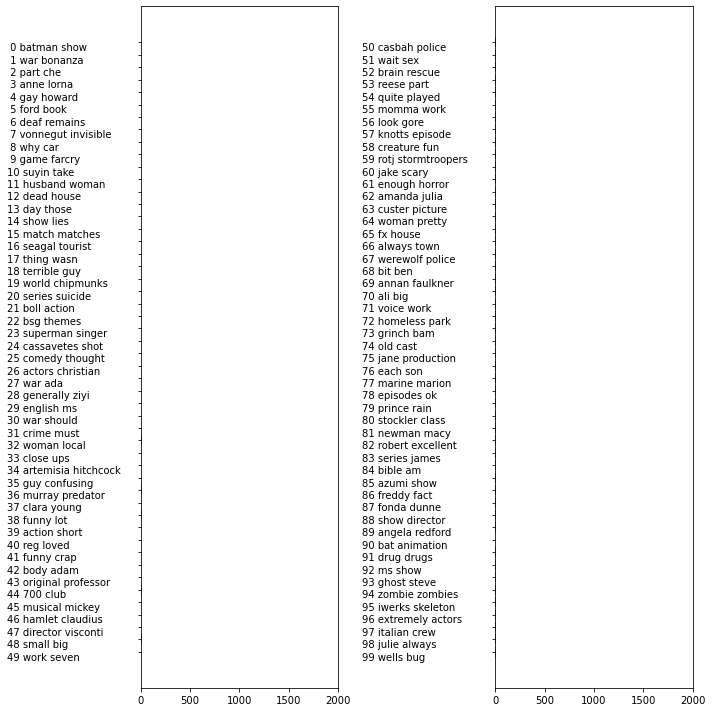

In [136]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
                for i, words in enumerate(feature_names[sorting[:, :2]])]
# two column bar chart:
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
    plt.tight_layout()

# Cross-validation & Model logreg

## Bag of words

The
most commonly used version of cross-validation is k-fold cross-validation, where k is
a user-specified number, by default is 3 and in our code we have explicitly specified below cv=5. When performing five-fold cross-validation,
the data is first partitioned into five parts of (approximately) equal size, called folds.
Next, a sequence of models is trained. The first model is trained using the first fold as
the test set, and the remaining folds (2–5) are used as the training set. The model is
built using the data in folds 2–5, and then the accuracy is evaluated on fold 1.

The parameters of the cross_val_score
function are the model we want to evaluate, the training data, and the ground-truth
labels.

As in this case cross_val_score performs five-fold cross-validation, it returns five accuracy values. 
A common way to summarize the cross-validation accuracy is to compute the mean.

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(solver='lbfgs', max_iter=140), X_train, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

C:\Users\Giuseppe Marino\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Giuseppe Marino\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

Mean cross-validation accuracy: 0.76


# Grid Search with Cross-Validation & Model LogReg 

## Bag of words

### Standard

Grid search is a for loop that finds the values of the important parameters of a
model (the ones that provide the best generalization performance).

As we know LogisticRegression
has a regularization parameter, C, which we can tune via Grid Search with Cross-Validation

In [80]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(solver='lbfgs', max_iter=170), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

X_test = vect.transform(text_test)
print("{:.2f}".format(grid.score(X_test, y_test)))

C:\Users\Giuseppe Marino\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Giuseppe Marino\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

Best cross-validation score: 0.77
Best parameters:  {'C': 0.1}
0.76


### Token minimum frequency

The best validation accuracy of the grid search will be unchanged from before.
We didn’t improve our model, but having fewer features to deal with speeds up processing
and throwing away useless features might make the model more interpretable. 

In [81]:
grid.fit(X_train_min_df, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

C:\Users\Giuseppe Marino\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Giuseppe Marino\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

Best cross-validation score: 0.77


### Token minimum frequency and stop words

The grid search performance will increase slightly using the stopwords, but given that excluding 305 features out of over 27,000 for the complete dataset and 2147  for the 1000 dataset is unlikely to
change performance or interpretability a lot, it doesn’t seem worth using this list.
Fixed lists are mostly helpful for small datasets, which might not contain enough
information for the model to determine which words are stopwords from the data
itself. 

In [82]:
grid.fit(X_train_stop_words, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))


Best cross-validation score: 0.78


### Token minimum frequency, stop words and maximum frequency

By fixing max_df=50 we have got rid of 80 features while performance stays the same.


In [83]:
grid.fit(X_train_max_df, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.77


### Term frequency–inverse document frequency (tf-idf) method

Because tf–idf actually makes use of the statistical properties of the training data, we
will use a pipeline to ensure the results of our grid search
are valid.

As you can see, there is some improvement when using tf–idf instead of just word
counts. We can also inspect which words tf–idf found most important. Keep in mind
that the tf–idf scaling is meant to find words that distinguish documents, but it is a
purely unsupervised technique. So, “important” here does not necessarily relate to the
“positive review” and “negative review” labels we are interested in.

Features with low tf–idf are those that either are very commonly used across documents
or are only used sparingly, and only in very long documents. Interestingly,
many of the high-tf–idf features actually identify certain shows or movies. These
terms only appear in reviews for this particular show or franchise, but tend to appear
very often in these particular reviews. This is very clear, for example, for jane' 'gay' 'musical' 'tom' 'disney' 'war' 'woman' 'julia' 'drug', they could actually also refer to a
movie title. These words are unlikely to help us in our sentiment classification task
(unless maybe some franchises are universally reviewed positively or negatively) but
certainly contain a lot of specific information about the reviews.

Finally, we can also find the words that have low inverse document frequency—that is, those
that appear frequently and are therefore deemed less important. The inverse document
frequency values found on the training set are stored in the idf_ attribute. In this list we will find mostly English stopwords like "the" and "no". But some are
clearly domain-specific to the movie reviews, like "movie", "film", "time", "story",
and so on. Interestingly, "good", "great", and "bad" are also among the most frequent
and therefore “least relevant” words according to the tf–idf measure, even
though we might expect these to be very important for our sentiment analysis task.

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None), LogisticRegression(solver='lbfgs', max_iter=140))
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# transform the training dataset
X_train = vectorizer.transform(text_train)
# find maximum value for each of the features over the dataset
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# get feature names
feature_names = np.array(vectorizer.get_feature_names())
print("Features with lowest tfidf:\n{}".format(feature_names[sorted_by_tfidf[:20]]))
print("Features with highest tfidf: \n{}".format(feature_names[sorted_by_tfidf[-20:]]))

sorted_by_idf = np.argsort(vectorizer.idf_)
print("Features with lowest idf:\n{}".format(
feature_names[sorted_by_idf[:100]]))

Best cross-validation score: 0.80
Features with lowest tfidf:
['beginning' 'couple' 'known' 'dialogue' 'stop' 'went' 'directed'
 'writing' 'thinking' 'couldn' 'leads' 'setting' 'order' 'somewhat' 'run'
 'except' 'disappointing' 'seriously' 'please' 'bring']
Features with highest tfidf: 
['of' 'that' 'jane' 'gay' 'musical' 'part' 'was' 'to' 'match' 'and'
 'dance' 'pretty' 'tom' 'disney' 'war' 'woman' 'julia' 'drug' 'drugs'
 'the']
Features with lowest idf:
['the' 'of' 'and' 'to' 'is' 'this' 'in' 'it' 'that' 'with' 'for' 'but'
 'on' 'as' 'was' 'not' 'movie' 'you' 'film' 'have' 'one' 'are' 'at' 'be'
 'all' 'an' 'who' 'so' 'from' 'like' 'by' 'just' 'there' 'his' 'out' 'or'
 'he' 'they' 'has' 'about' 'some' 'if' 'can' 'what' 'very' 'more' 'which'
 'see' 'good' 'up' 'no' 'even' 'time' 'when' 'my' 'well' 'their' 'would'
 'only' 'really' 'had' 'much' 'than' 'way' 'were' 'get' 'story' 'me'
 'into' 'first' 'also' 'most' 'how' 'other' 'made' 'bad' 'been' 'do' 'her'
 'will' 'its' 'make' 'them' 'gr

### Bar-chatting Model Coefficients

The following bar chart shows the 25 largest and 25 smallest coefficients
of the logistic regression model trained, based on the tf–idf features, with the bars showing the size of each coefficient.

The negative coefficients on the left belong to words that according to the model are
indicative of negative reviews, while the positive coefficients on the right belong to
words that according to the model indicate positive reviews. Most of the terms are
quite intuitive, like "worst", "waste", "disappointment", and "laughable" indicating
bad movie reviews, while "excellent", "wonderful", "enjoyable", and
"refreshing" indicate positive movie reviews. Some words are slightly less clear, like
"bit", "job", and "today", but these might be part of phrases like “good job” or “best
today.”

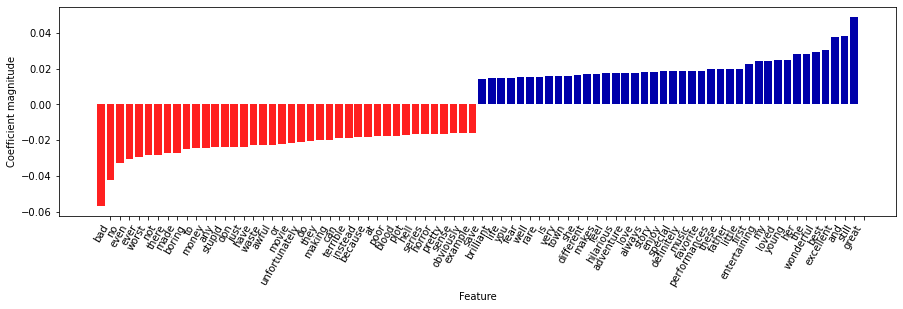

In [85]:
import mglearn

mglearn.tools.visualize_coefficients(grid.best_estimator_.named_steps["logisticregression"].coef_,feature_names, n_top_features=40)

### n-Grams Method

Let’s find the best
setting of n-gram range using a grid search.



In [86]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())
# running the grid search takes a long time because of the
# relatively large grid and the inclusion of trigrams
param_grid = {"logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100],
"tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))


Best cross-validation score: 0.82
Best parameters:
{'logisticregression__C': 10, 'tfidfvectorizer__ngram_range': (1, 3)}


### Heat map and Bar-chat

We can visualize the cross-validation
accuracy as a function of the ngram_range and C parameter as a heat map. From the heat map we can see that using bigrams increases performance quite a bit,
while adding trigrams only provides a very small benefit in terms of accuracy. 

To
understand better how the model improved, we can visualize the important coefficient for the best model, which includes unigrams, bigrams, and trigrams.There are particularly interesting features containing the word “worth” that were not
present in the unigram model: "not worth" is indicative of a negative review, while
"definitely worth" and "well worth" are indicative of a positive review. This is a
prime example of context influencing the meaning of the word “worth.”

Next, we’ll visualize only trigrams, to provide further insight into why these features
are helpful. Many of the useful bigrams and trigrams consist of common words that
would not be informative on their own, as in the phrases "none of the", "the only
good", "on and on", "this is one", "of the most", and so on. However, the
impact of these features is quite limited compared to the importance of the unigram
features,

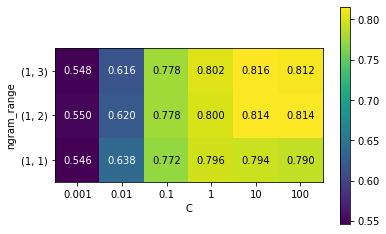

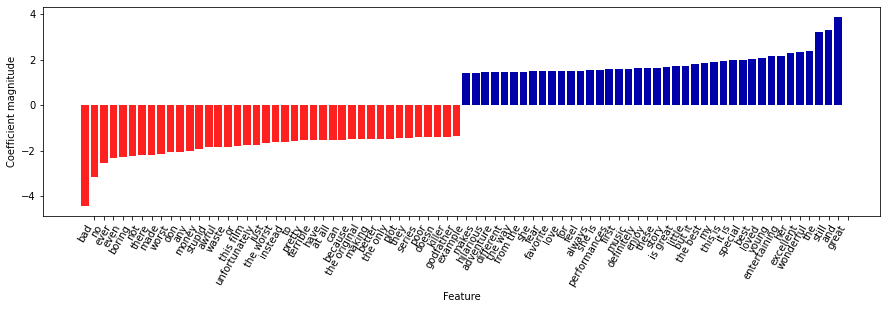

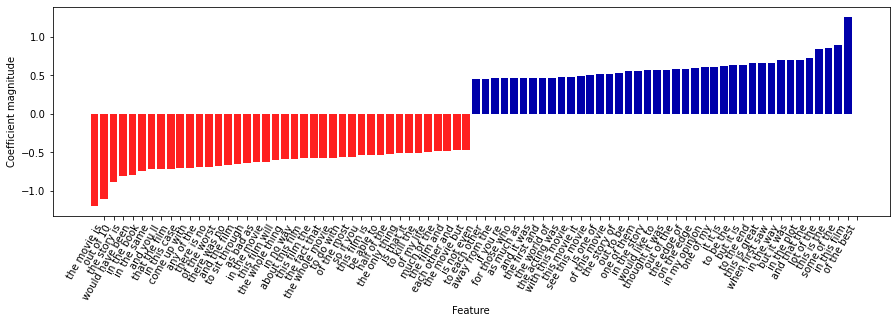

In [79]:
# extract scores from grid_search
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T
# visualize heat map
heatmap = mglearn.tools.heatmap(
scores, xlabel="C", ylabel="ngram_range", cmap="viridis", fmt="%.3f",
xticklabels=param_grid['logisticregression__C'],
yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

# extract feature names and coefficients
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=40)

# find 3-gram features
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3
# visualize only 3-gram features
mglearn.tools.visualize_coefficients(coef.ravel()[mask],
feature_names[mask], n_top_features=40)

# Grid Search with Stratified Shuffle Split & Model LogReg 

## Lemmatization representations 

To
illustrate how lemmatization can help, we will use StratifiedShuffleSplit for
cross-validation, using only 1% of the data as training data and the rest as test data:

In [60]:
from sklearn.model_selection import StratifiedShuffleSplit

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.99, train_size=0.01, random_state=0)
grid = GridSearchCV(LogisticRegression(solver='lbfgs', max_iter=200), param_grid, cv=cv)

# perform grid search with standard CountVectorizer
grid.fit(X_train, y_train)
print("Best cross-validation score " "(standard CountVectorizer): {:.3f}".format(grid.best_score_))

# perform grid search with lemmatization
grid.fit(X_train_lemma, y_train)
print("Best cross-validation score " "(lemmatization): {:.3f}".format(grid.best_score_))

Best cross-validation score (standard CountVectorizer): 0.509
Best cross-validation score (lemmatization): 0.509


C:\Users\Giuseppe Marino\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
